In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012007_31122010.csv'), encoding = "ISO-8859-1", sep = ';')

/tmp/ipykernel_3043764/2379821536.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.abspath('../data/Nal_filtre_FLX_NEE_01012007_31122010.csv'), encoding = "ISO-8859-1", sep = ';')


---

In [5]:
df.head(5)

,hour (numeric),Date (dd/mm/yyyy hh:mm),Net Ecosystem Exchange which is the CO2 (umol/m2/s),Friction Velocity (m/s),Incoming shortwave radiation (W/m2),Air temperature (°C),Water vapor deficit (kpa),Soil temperature at 10 cm below the surface (°C),Soil moisture at 10 cm below the surface (cm3/cm3),Soil moisture at 30 cm below the surface (cm3/cm3)
0,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2007 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.5,01/01/2007 00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,01/01/2007 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.5,01/01/2007 01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

In [6]:
print(df.columns)

Index(['hour (numeric)', 'Date (dd/mm/yyyy hh:mm)',
       'Net Ecosystem Exchange  which is the CO2 (umol/m2/s)',
       'Friction Velocity (m/s)', 'Incoming shortwave radiation (W/m2)',
       'Air temperature (°C)', 'Water vapor deficit (kpa)',
       'Soil temperature at 10 cm below the surface (°C)',
       'Soil moisture at 10 cm below the surface (cm3/cm3)',
       'Soil moisture at 30 cm below the surface (cm3/cm3)'],
      dtype='object')


---

fixing the name to be the 1st row

In [7]:
df.columns = df.iloc[0] # fix the col names to be the 1st col
df = df.iloc[1:] # fix the col names to be the 1st col

In [8]:
df.head(2)

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2007 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.5,01/01/2007 00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

In [9]:
df.shape
# why all of them of typoe object (it should be float64)

(70128, 10)

---

In [10]:
df.describe()

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
count,70128,70128,30314,42426,58457,58457,58457,58457,58649,58649
unique,96,70128,30313,29201,26637,7115,3966,5465,223,269
top,0,01/01/2007 00:00,-4.801688923,0.18793,-0.4255,20.9,0.3,25.835,0.04,-999
freq,1366,1,2,6,38,66,4905,58,1688,1446


---

Checking the type

In [11]:
df.dtypes

0
heure       object
DateUTC     object
NEE         object
Ustar       object
Swin        object
T_meteo     object
VPD         object
Tsol1_10    object
Hv1         object
Hv2         object
dtype: object

we need to change the following [2:] to float64

In [12]:
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)

df

,heure,DateUTC,NEE,Ustar,Swin,T_meteo,VPD,Tsol1_10,Hv1,Hv2
1,0,01/01/2007 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.5,01/01/2007 00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,01/01/2007 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.5,01/01/2007 01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,01/01/2007 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
70124,21.5,31/12/2010 21:30,NaN,0.22143,-2.928,21.16,1.9,29.205,0.038,0.056
70125,22.0,31/12/2010 22:00,NaN,0.24661,-2.6875,21.04,1.9,28.845,0.038,0.056
70126,22.5,31/12/2010 22:30,NaN,0.25817,-3.1505,20.475,1.8,28.51,0.038,0.056
70127,23.0,31/12/2010 23:00,NaN,0.2795,-2.6415,20.18,1.8,28.205,0.038,0.056


---

Graphs

NEE


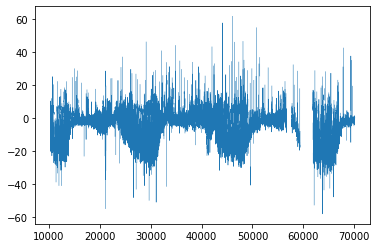

Ustar


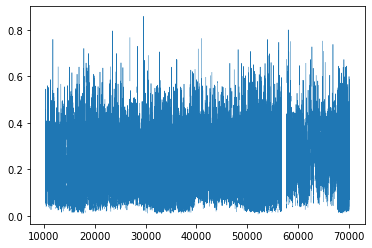

Swin


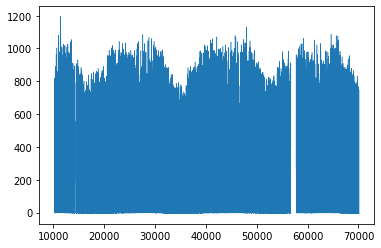

T_meteo


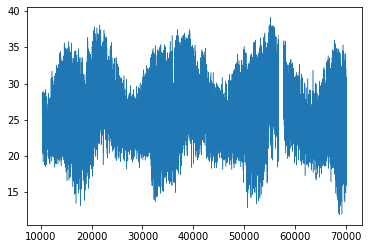

VPD


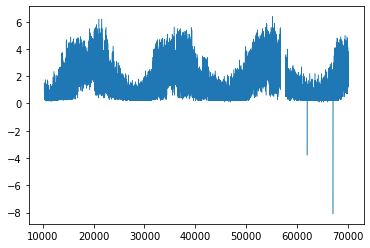

Tsol1_10


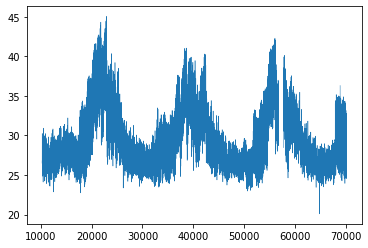

Hv1


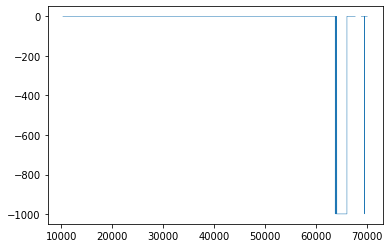

Hv2


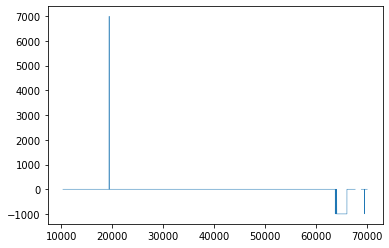

In [13]:
for col in df.columns[2:]:
    print(col)
    df[col].plot(linewidth=0.5)
    plt.show()
